<a href="https://colab.research.google.com/github/Sravani1801/Sravani1801_timer.io/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [11]:
data = pd.read_csv('stocks.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

<ipython-input-11-d7ebb705e638>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv('stocks.csv', parse_dates=['Date'])


In [5]:
data.sort_index(inplace=True)

In [6]:
data.fillna(method='ffill', inplace=True)

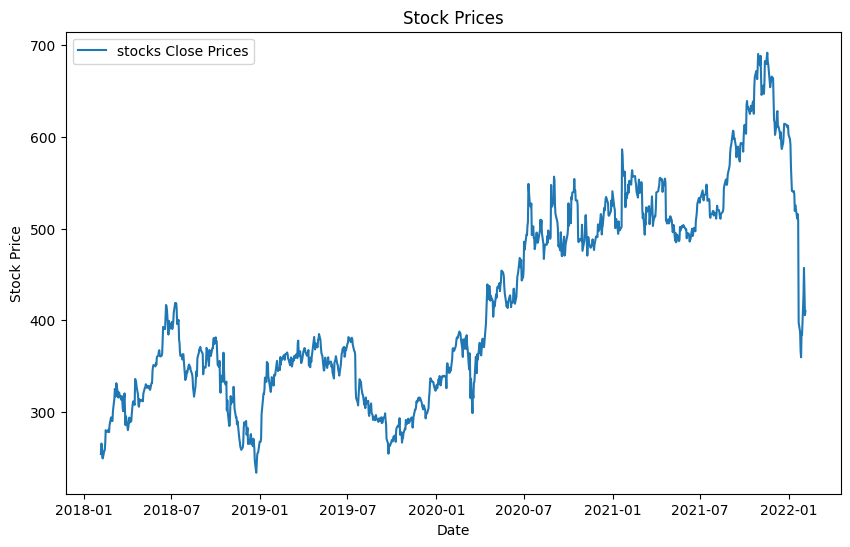

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='stocks Close Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='best')
plt.title('Stock Prices')
plt.show()

In [12]:
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [13]:
model = sm.tsa.ARIMA(train_data['Close'], order=(5, 1, 0))  # Adjust order as per the data
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [14]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
forecast = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Forecast')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


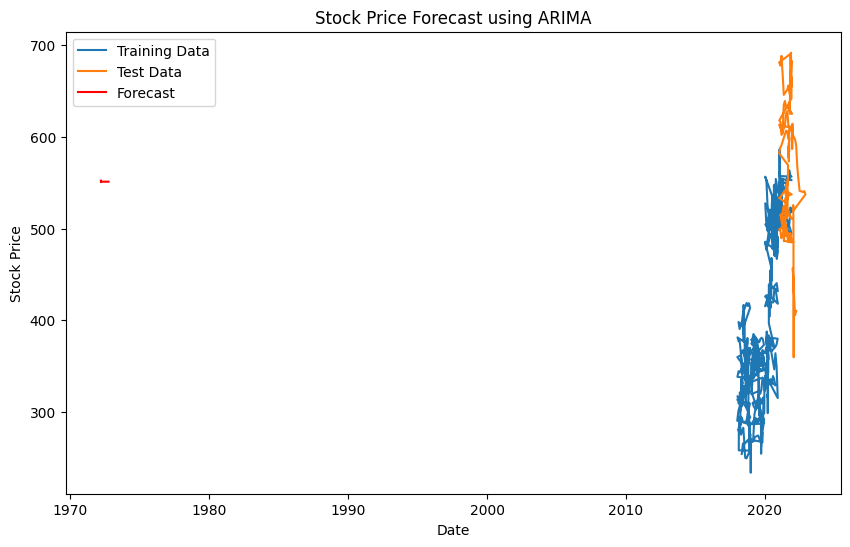

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['Close'], label='Training Data')
plt.plot(test_data['Close'], label='Test Data')
plt.plot(forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='best')
plt.title('Stock Price Forecast using ARIMA')
plt.show()